In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# select two colmun
df_linear=df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [4]:
df_linear.isnull().sum()

age     177
fare      0
dtype: int64

In [5]:
df_linear.age.fillna(value=df_linear['age'].mean(),inplace=True)

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_5084\1377016597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=df_linear['age'].mean(),inplace=True)


<AxesSubplot:ylabel='age'>

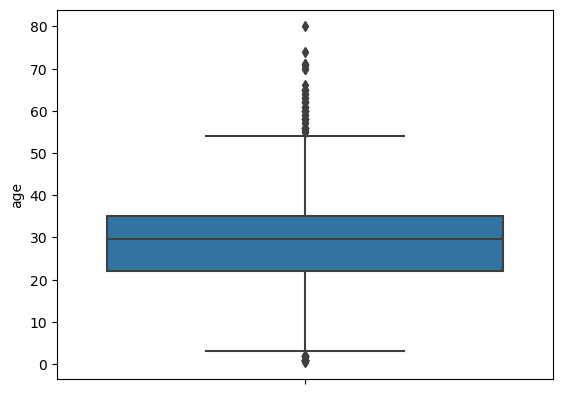

In [6]:
sns.boxplot(data=df_linear,y='age')

In [7]:
# Removing outliers
# setting age limit between 8-to-50
df_linear=df_linear[(df_linear['age'] > 8) &(df_linear['age'] < 50) ]

<AxesSubplot:ylabel='age'>

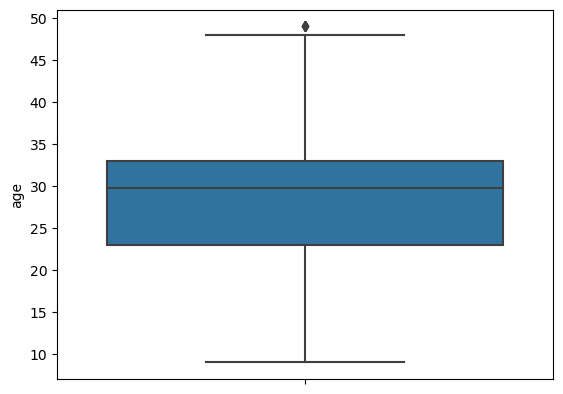

In [8]:
sns.boxplot(data=df_linear,y='age')

<AxesSubplot:ylabel='fare'>

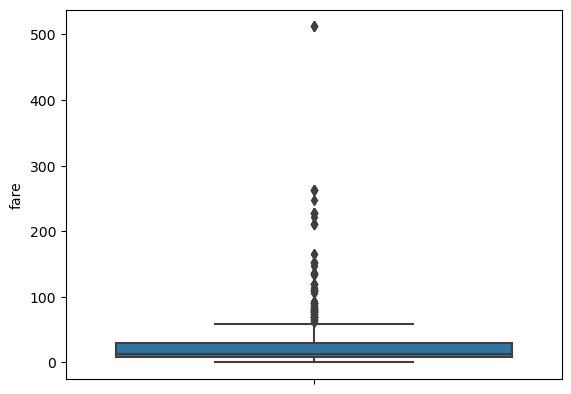

In [9]:
# Fare plot
sns.boxplot(data=df_linear,y='fare')

In [10]:
# Removing outliers
# setting fare limit between 1-to-35
df_linear=df_linear[(df_linear['fare'] > 1) &(df_linear['fare'] < 35) ]

<AxesSubplot:ylabel='fare'>

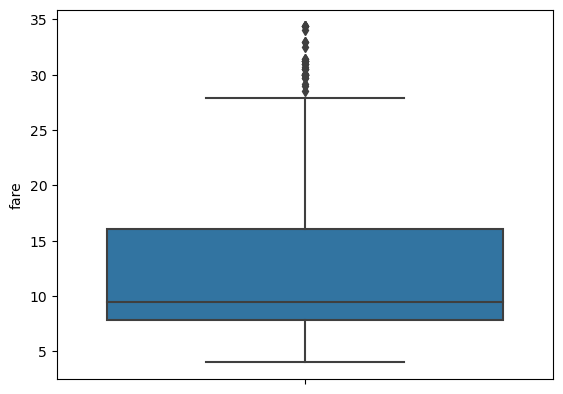

In [11]:
sns.boxplot(data=df_linear,y='fare')

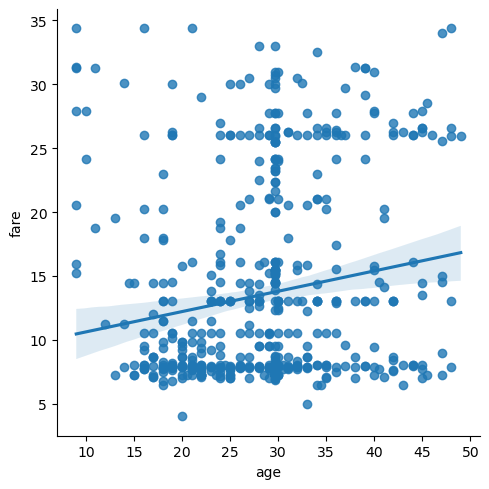

In [12]:
sns.lmplot(data=df_linear,x='age',y='fare')

In [13]:
X=df_linear[['age']]
y=df_linear['fare']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

# call the model
model = LinearRegression()

# train the model
model.fit(X,y)

LinearRegression()

In [15]:
model.predict([[80]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.75683314])

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.8,random_state=0)

# model
model=LinearRegression()

# train
model.fit(X_train,y_train)

# predict
prediction=model.predict(X_test)


<AxesSubplot:xlabel='fare'>

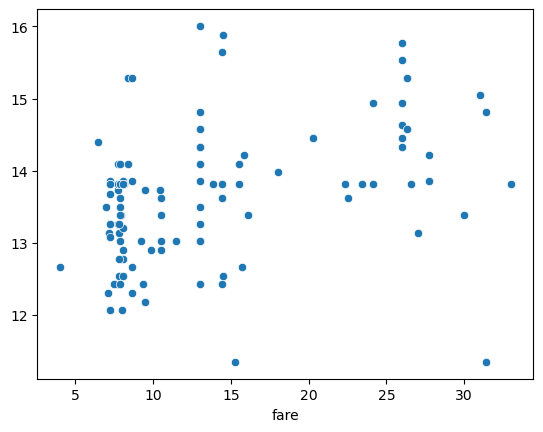

In [17]:
# compare
sns.scatterplot(x=y_test,y=prediction)

In [18]:
model.score(X_test,y_test)

0.06182105231039703

# Model evaluation with metrics
### 1-r2
### 2-mean squared error
### 3-MAE
### 4-RMSE

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

MAE=mean_absolute_error(y_true=y_test,y_pred=prediction)
MSE=mean_squared_error(y_true=y_test,y_pred=prediction)
RMSE=mean_squared_error(y_true=y_test,y_pred=prediction,squared=False)
R2=r2_score(y_true=y_test,y_pred=prediction)

print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("R_squared:",R2)

MAE: 5.825259018976992
MSE: 50.04625083505158
RMSE: 7.07433748382501
R_squared: 0.06182105231039703


In [20]:
# These tests in numpy
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

7.07433748382501